In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (25, 10)  # Размер картинок

In [2]:
pd.__version__

'1.1.5'

In [34]:
data = pd.read_excel(r'R:\AmanovRA\Оборот.xlsx')

In [35]:
from sklearn import preprocessing

x = data['Sum([Стоимость полная])'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data['Нормализованные суммы'] = x_scaled

AttributeError: 'Line2D' object has no property 'subplot'

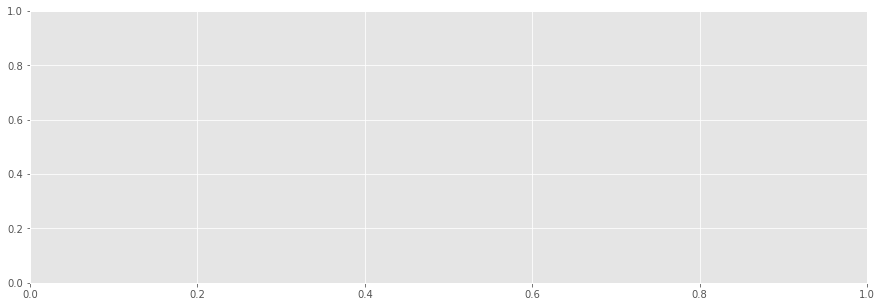

In [19]:
for filial in data['Филиал'].unique():
    data[data['Филиал']== filial][['Месяц', 'Нормализованные суммы']].plot()

In [18]:
data

,Филиал,Месяц,Sum([Стоимость полная]),Нормализованные суммы
0,Б.С. 45,янв.,27342770.81,0.903366
1,Б.С. 45,февр.,29742358.64,0.982645
2,Б.С. 45,мар.,28548267.67,0.943193
3,Б.С. 45,апр.,14862112.73,0.491023
4,Б.С. 45,мая,17485047.80,0.577681
...,...,...,...,...
234,Щерб.11,июл.,3144938.06,0.103904
235,Щерб.11,авг.,3777744.38,0.124811
236,Щерб.11,сент.,4106474.44,0.135672
237,Щерб.11,окт.,4801294.36,0.158628


In [20]:
dct = dict(zip('''янв.
февр.
мар.
апр.
мая
июн.
июл.
авг.
сент.
окт.
нояб.
'''.split('\n'), range(1, 12)))

In [22]:
data = data.replace(dct)

In [24]:
data.drop('Sum([Стоимость полная])', axis=1, inplace=True)

In [27]:
data = data.sort_values('Месяц').reset_index(drop=True)

C:\Users\AmanovRA\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\AmanovRA\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\AmanovRA\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplot

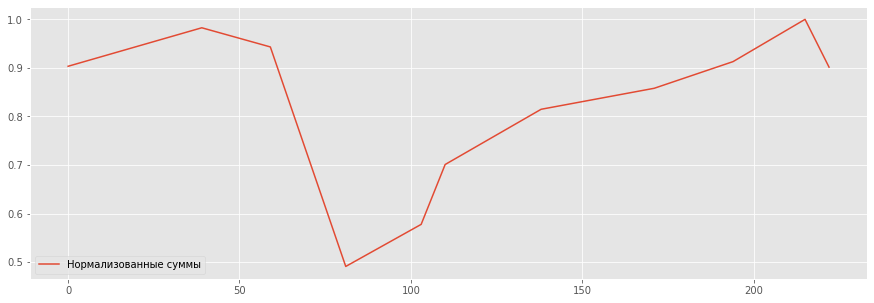

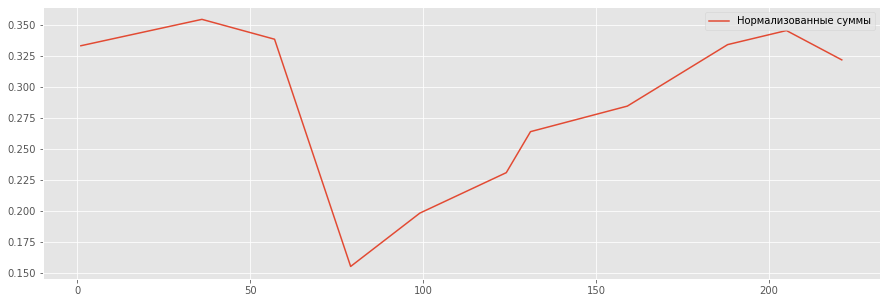

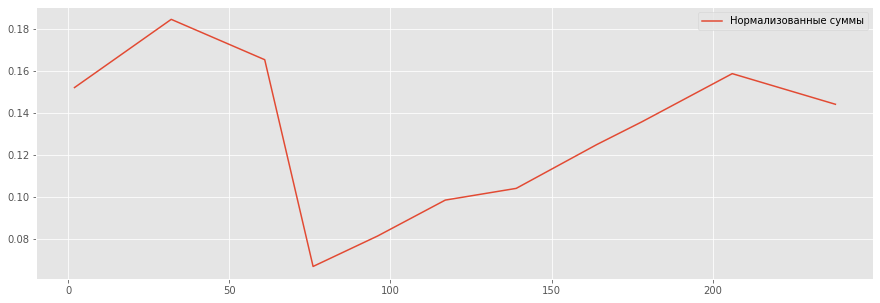

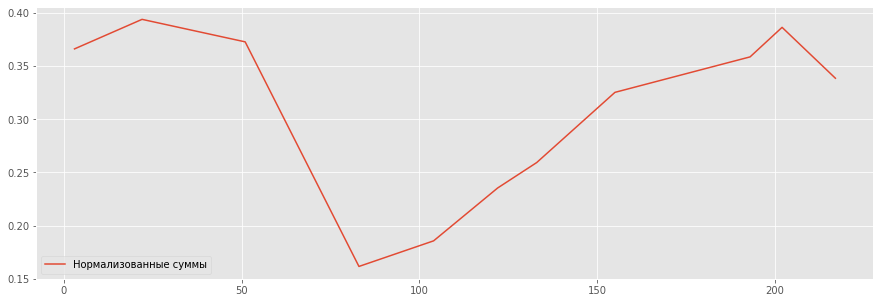

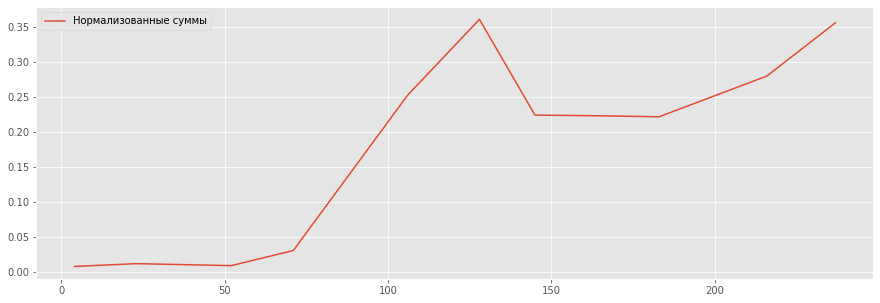

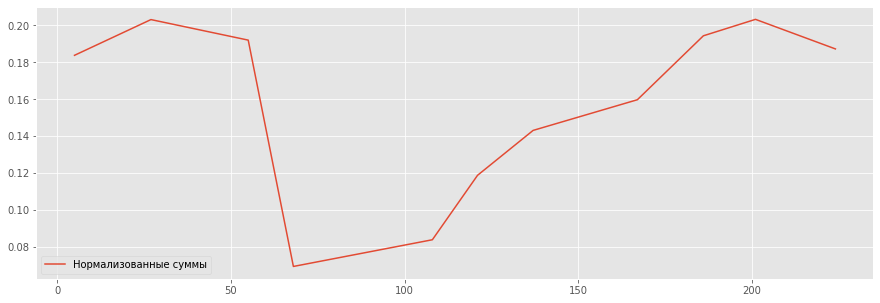

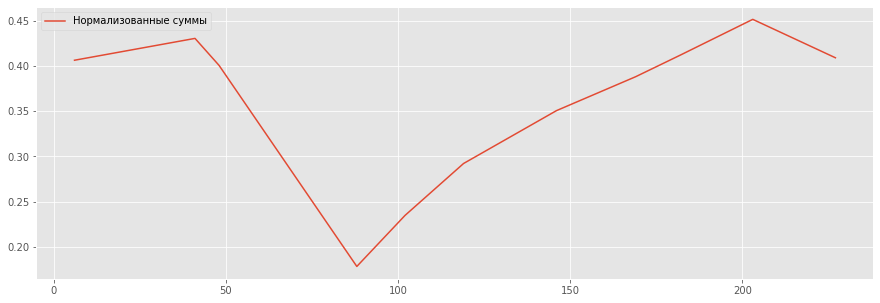

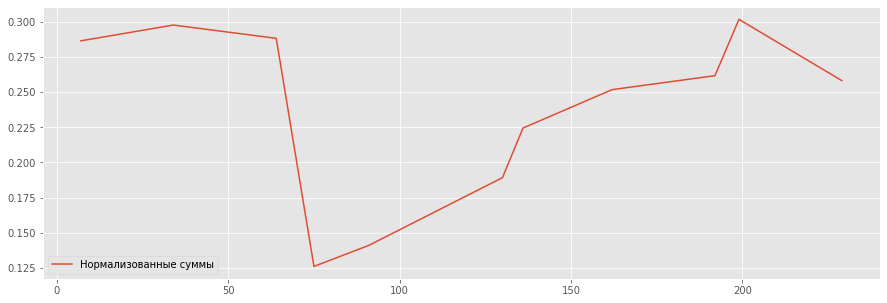

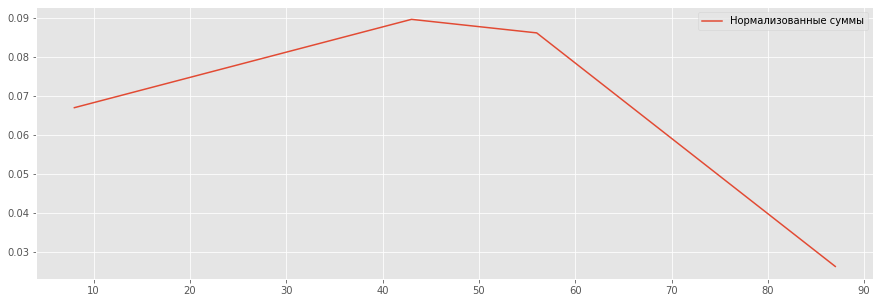

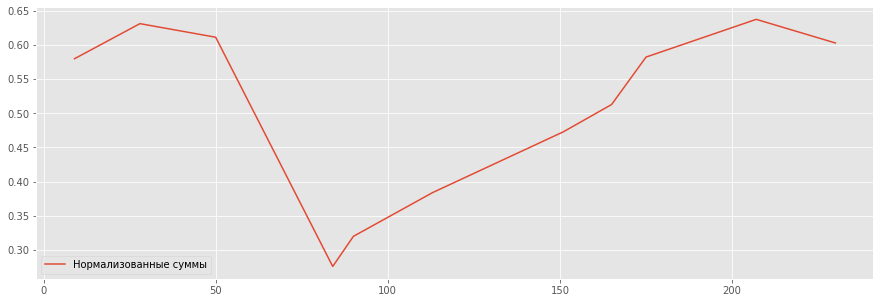

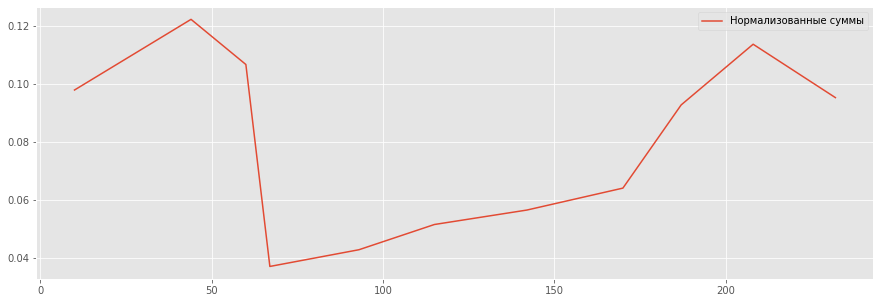

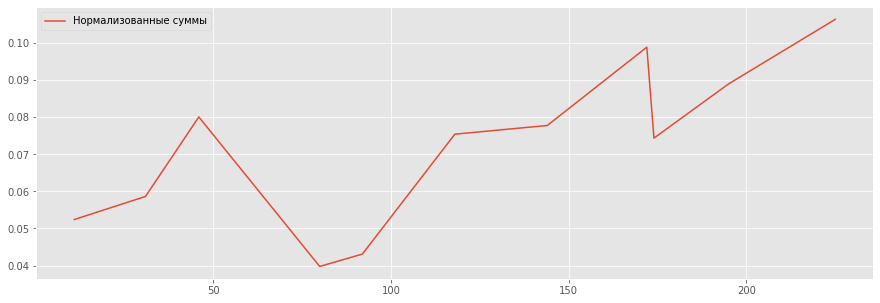

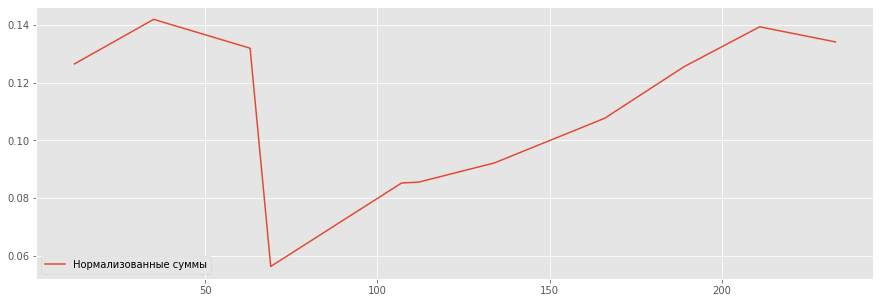

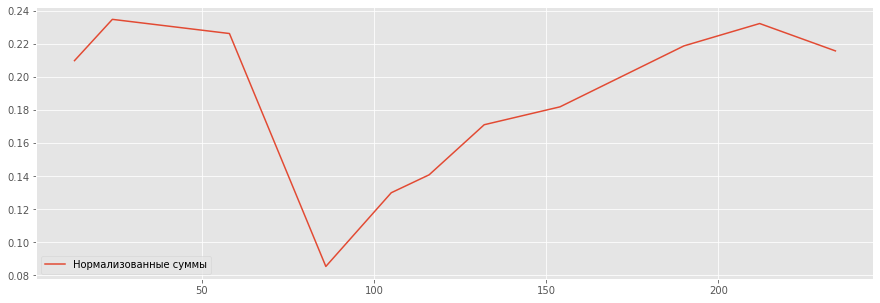

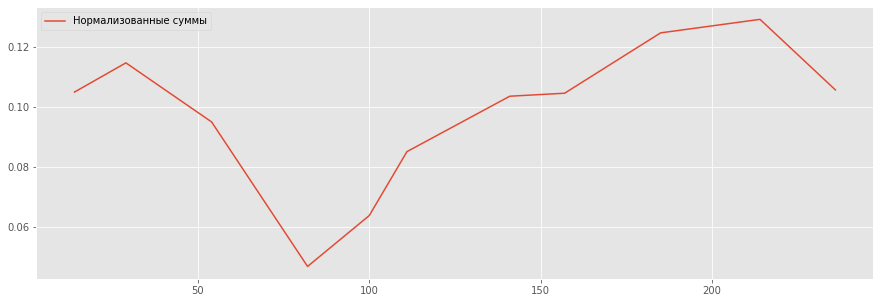

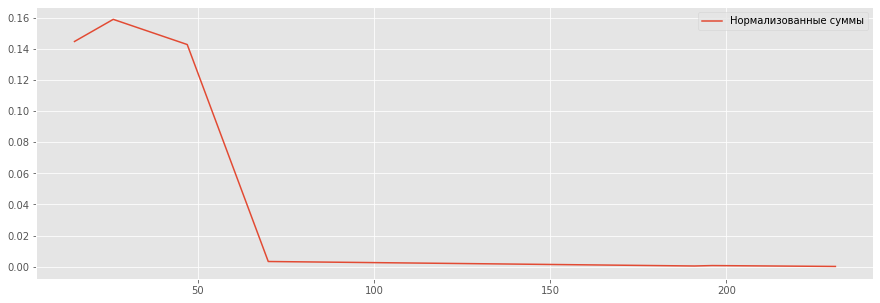

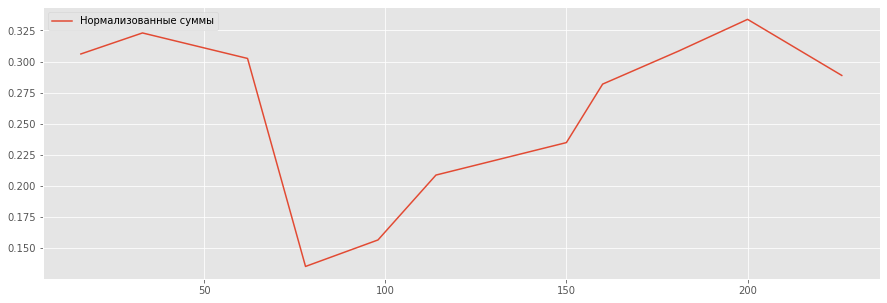

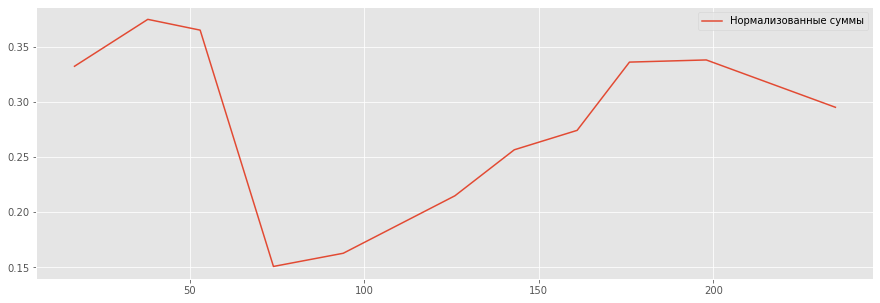

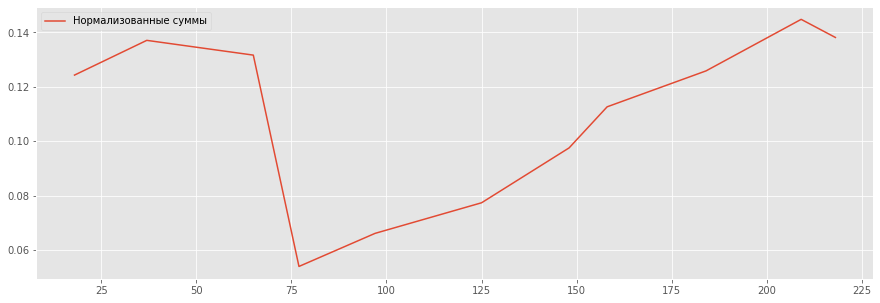

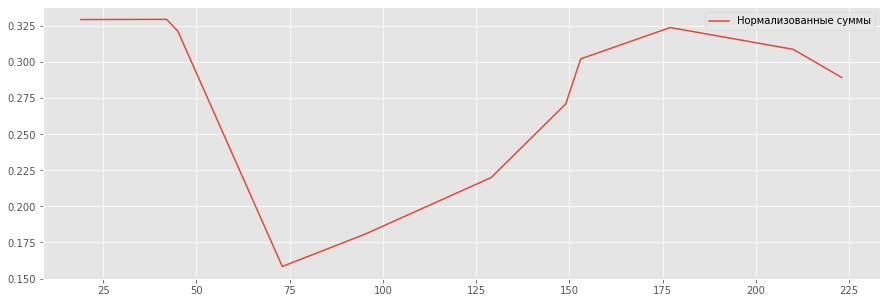

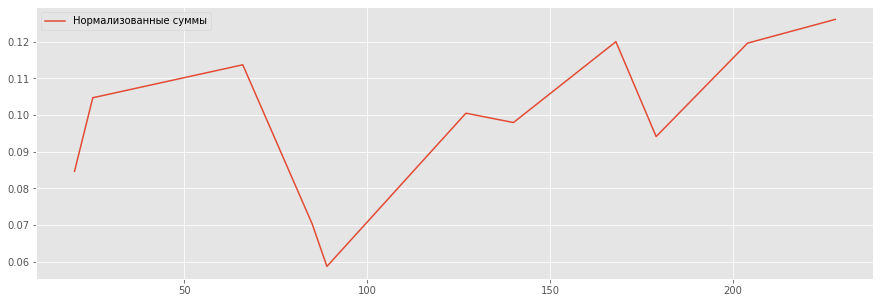

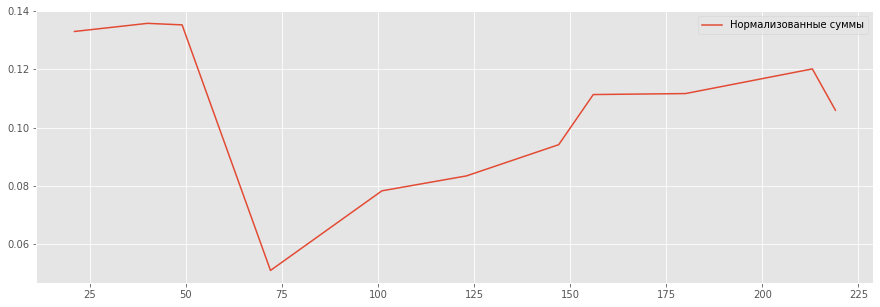

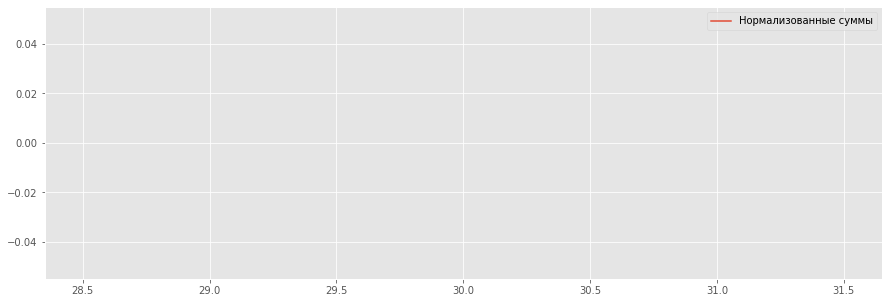

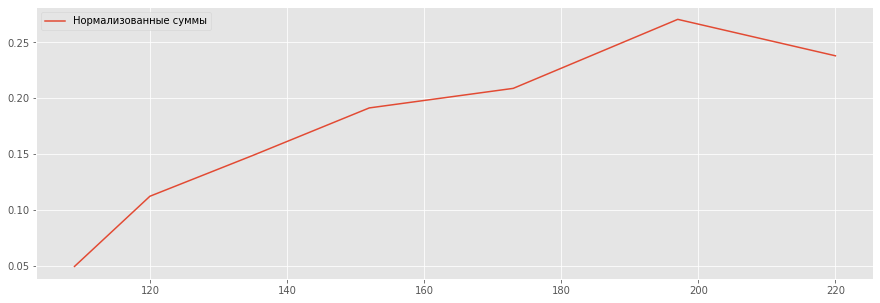

In [32]:
for filial in data['Филиал'].unique():
    data[data['Филиал']== filial][['Нормализованные суммы']].plot()

In [37]:
data.drop('Sum([Стоимость полная])', axis=1, inplace=True)

In [43]:
data_new = data.pivot_table(values='Нормализованные суммы', index='Месяц', columns='Филиал', aggfunc='first')

In [45]:
data_new.drop(['Телемедицина', 'ЦАХ','РЦ БС 45'],axis=1, inplace=True)

In [46]:
data_new.drop(['Коорд служба', 'ЦАХ','РЦ БС 45'],axis=1, inplace=True)

Филиал,Б.С. 45,Богатыр 49к1,Брянцева 13,Гаврил.11,Гарьк. 15к3,Гаст. 22,Жукова 18,КИМа 28,Колл. 4к1,Колл. 6к1,...,Коменд 51к1,Коорд служба,Ленская 17к1,Мар. 48,Маршака 4,Мор. 3к2,Сик. 7к2,Ст.П. 39А,Шаврова 26,Щерб.11
Месяц,,,,,,,,,,,,,,,,,,,,,
авг.,0.858024,0.111393,0.302320,0.112674,0.284501,0.325420,0.223424,0.159791,0.388176,0.119982,...,NaN,NaN,0.512899,0.064069,0.107678,0.182061,0.281855,0.274152,0.191275,0.124811
апр.,0.491023,0.051043,0.158371,0.053995,0.155338,0.161594,0.030907,0.069528,0.178248,0.070255,...,0.026160,NaN,0.275476,0.037078,0.056235,0.085406,0.135177,0.150871,NaN,0.066676
июл.,0.814768,0.094195,0.271142,0.097570,0.263919,0.259378,0.224272,0.143189,0.350646,0.097949,...,NaN,NaN,0.472921,0.056511,0.092182,0.171234,0.234805,0.256558,0.148684,0.103904
июн.,0.701003,0.083482,0.220023,0.077403,0.230896,0.235406,0.360973,0.118870,0.292133,0.100495,...,NaN,NaN,0.383733,0.051529,0.085502,0.140899,0.208686,0.214908,0.112151,0.098320
мар.,0.943193,0.135298,0.321501,0.131681,0.338372,0.372933,0.009372,0.192071,0.400607,0.113680,...,0.086174,NaN,0.611564,0.106662,0.131983,0.226469,0.302491,0.364960,NaN,0.165268
мая,0.577681,0.078364,0.180548,0.066154,0.198290,0.185684,0.252656,0.083981,0.234709,0.058746,...,NaN,NaN,0.319602,0.042839,0.085203,0.130044,0.156490,0.162821,0.049266,0.081185
нояб.,0.901559,0.106022,0.289419,0.138166,0.321737,0.338696,0.356088,0.187311,0.409108,0.126059,...,NaN,NaN,0.603129,0.095249,0.134175,0.215950,0.288822,0.295057,0.237978,0.144012
окт.,1.000000,0.120189,0.308938,0.144825,0.345365,0.386584,0.280006,0.203316,0.451600,0.119585,...,NaN,NaN,0.637760,0.113644,0.139408,0.232525,0.333934,0.337947,0.270617,0.158628
сент.,0.912963,0.111731,0.324081,0.125883,0.334035,0.358792,0.221891,0.194412,0.412129,0.094135,...,NaN,NaN,0.582459,0.092735,0.125535,0.218971,0.308477,0.335991,0.208791,0.135672


In [47]:
data_new.dropna(how='any', axis=1)

Филиал,Б.С. 45,Богатыр 49к1,Брянцева 13,Гаврил.11,Гарьк. 15к3,Гаст. 22,Жукова 18,КИМа 28,Колл. 4к1,Колл. 6к1,Колом. 28,Ленская 17к1,Мар. 48,Маршака 4,Мор. 3к2,Сик. 7к2,Ст.П. 39А,Щерб.11
Месяц,,,,,,,,,,,,,,,,,,
авг.,0.858024,0.111393,0.302320,0.112674,0.284501,0.325420,0.223424,0.159791,0.388176,0.119982,0.251867,0.512899,0.064069,0.107678,0.182061,0.281855,0.274152,0.124811
апр.,0.491023,0.051043,0.158371,0.053995,0.155338,0.161594,0.030907,0.069528,0.178248,0.070255,0.125963,0.275476,0.037078,0.056235,0.085406,0.135177,0.150871,0.066676
июл.,0.814768,0.094195,0.271142,0.097570,0.263919,0.259378,0.224272,0.143189,0.350646,0.097949,0.224540,0.472921,0.056511,0.092182,0.171234,0.234805,0.256558,0.103904
июн.,0.701003,0.083482,0.220023,0.077403,0.230896,0.235406,0.360973,0.118870,0.292133,0.100495,0.189197,0.383733,0.051529,0.085502,0.140899,0.208686,0.214908,0.098320
мар.,0.943193,0.135298,0.321501,0.131681,0.338372,0.372933,0.009372,0.192071,0.400607,0.113680,0.288385,0.611564,0.106662,0.131983,0.226469,0.302491,0.364960,0.165268
мая,0.577681,0.078364,0.180548,0.066154,0.198290,0.185684,0.252656,0.083981,0.234709,0.058746,0.140958,0.319602,0.042839,0.085203,0.130044,0.156490,0.162821,0.081185
нояб.,0.901559,0.106022,0.289419,0.138166,0.321737,0.338696,0.356088,0.187311,0.409108,0.126059,0.258280,0.603129,0.095249,0.134175,0.215950,0.288822,0.295057,0.144012
окт.,1.000000,0.120189,0.308938,0.144825,0.345365,0.386584,0.280006,0.203316,0.451600,0.119585,0.301909,0.637760,0.113644,0.139408,0.232525,0.333934,0.337947,0.158628
сент.,0.912963,0.111731,0.324081,0.125883,0.334035,0.358792,0.221891,0.194412,0.412129,0.094135,0.261814,0.582459,0.092735,0.125535,0.218971,0.308477,0.335991,0.135672


In [49]:
data_new = data_new.dropna(how='any', axis=1)

In [51]:
data_new['Итог'] = data_new.sum(axis=1)

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
data_new.heat

Филиал,Б.С. 45,Богатыр 49к1,Брянцева 13,Гаврил.11,Гарьк. 15к3,Гаст. 22,Жукова 18,КИМа 28,Колл. 4к1,Колл. 6к1,Колом. 28,Ленская 17к1,Мар. 48,Маршака 4,Мор. 3к2,Сик. 7к2,Ст.П. 39А,Щерб.11,Итог
Филиал,,,,,,,,,,,,,,,,,,,
Б.С. 45,1.000000,0.930095,0.967815,0.976657,0.985456,0.977935,-0.064803,0.989385,0.993852,0.755943,0.989011,0.987302,0.912917,0.950663,0.982288,0.988875,0.964244,0.939883,0.993726
Богатыр 49к1,0.930095,1.000000,0.948023,0.899921,0.950167,0.951882,-0.299554,0.921061,0.913085,0.572787,0.953660,0.924715,0.898960,0.924903,0.939153,0.930460,0.954126,0.954764,0.914802
Брянцева 13,0.967815,0.948023,1.000000,0.934840,0.969823,0.969600,-0.196713,0.967404,0.966056,0.662535,0.974016,0.957951,0.867739,0.907117,0.950446,0.974004,0.965354,0.913022,0.954958
Гаврил.11,0.976657,0.899921,0.934840,1.000000,0.979425,0.975179,-0.063133,0.986575,0.976103,0.754788,0.969129,0.995184,0.940913,0.976553,0.982155,0.976600,0.945281,0.943464,0.985194
Гарьк. 15к3,0.985456,0.950167,0.969823,0.979425,1.000000,0.989011,-0.130331,0.994196,0.979375,0.674984,0.982740,0.991468,0.947345,0.977208,0.994567,0.986619,0.980164,0.961287,0.986829
Гаст. 22,0.977935,0.951882,0.969600,0.975179,0.989011,1.000000,-0.188046,0.987970,0.970876,0.693051,0.988777,0.985100,0.950408,0.964908,0.976666,0.992964,0.981056,0.969071,0.976648
Жукова 18,-0.064803,-0.299554,-0.196713,-0.063133,-0.130331,-0.188046,1.000000,-0.096507,-0.001780,0.274300,-0.176647,-0.114848,-0.268122,-0.082477,-0.087676,-0.101145,-0.284726,-0.281977,0.002512
КИМа 28,0.989385,0.921061,0.967404,0.986575,0.994196,0.987970,-0.096507,1.000000,0.984661,0.728025,0.982815,0.995469,0.939107,0.965184,0.987329,0.991708,0.975209,0.948683,0.991721
Колл. 4к1,0.993852,0.913085,0.966056,0.976103,0.979375,0.970876,-0.001780,0.984661,1.000000,0.755878,0.978957,0.980888,0.888457,0.947523,0.975530,0.988977,0.940396,0.915102,0.994762


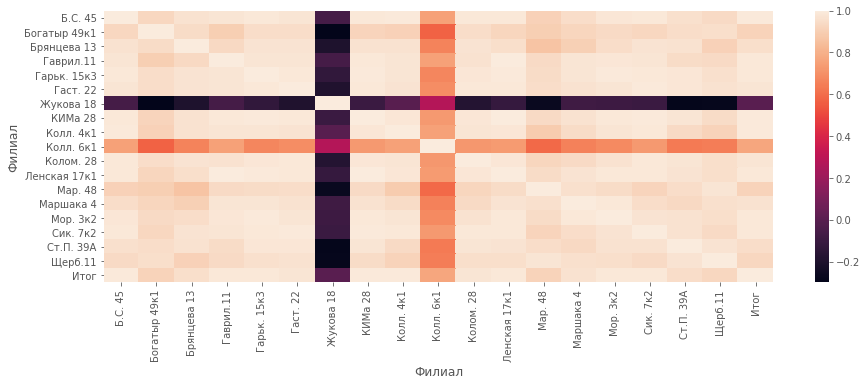

In [54]:
import seaborn as sns
corr = data_new.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [55]:
data_new.corr().to_excel('Таблица корреляций.xlsx')

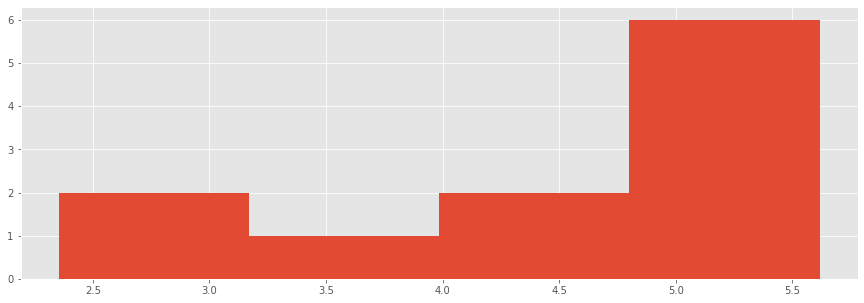

In [60]:
data_new['Итог'].hist(bins=4)

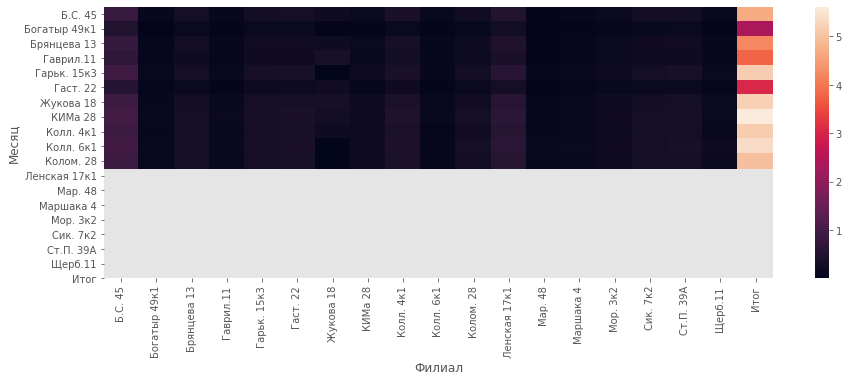

In [61]:
import seaborn as sns

sns.heatmap(data_new, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [7]:
from itertools import permutations, combinations

a = [1, 1, 1]

print(len([i for i in combinations(a, 2)]))

print(len([i for i in permutations(a, 2)]))

3
6


In [43]:
import pandas as pd
import re
import os

pattern = r'(.+)@(.+\.{1}[a-zA-Z]+)'

s = 'amanov@gmail.com'

def search_domen(x):
    if re.search(pattern, x):
        return re.search(pattern, x).groups()[1].lower()

path = ('R:', 'AmanovRA', 'email.xlsx')    
emails = pd.read_excel(os.path.join('R:', 'AmanovRA', 'email.xlsx'), dtype=str)    
    
    

In [44]:
emails['Домены'] = emails['Электронный адрес Пациента'].apply(search_domen)

In [45]:
emails = emails.dropna()

In [46]:
from collections import Counter

c = Counter(emails['Домены'])

In [47]:
domens = pd.DataFrame([c])

In [48]:
domens = domens.T

In [49]:
domens = domens.rename(columns={0: 'Кол-во ящиков'})

In [50]:
domens = domens.sort_values('Кол-во ящиков', ascending=False)

In [51]:
domens.to_excel('Домены.xlsx')

In [16]:
forms = pd.read_excel(r'C:\Users\AmanovRA\Текущее2\формы\Копия Результаты формы_Справка о записи 07.12.2020.xlsx')
base = pd.read_excel(r'C:\Users\AmanovRA\Текущее2\формы\база.xlsx')

In [18]:
forms['Дата приема, подтверждение которого необходимо'] = pd.to_datetime(forms['Дата приема, подтверждение которого необходимо'], format='%d.%m.%Y')

In [20]:
forms.head()

,ID,Статус,Изменено,Создатель,Посетитель,Сессия,Фамилия пациента,Имя пациента,Отчество пациента,Дата рождения пациента,"Дата приема, подтверждение которого необходимо","Время приема, подтверждение которого необходимо",Требуется ли пациенту сопровождающее лицо,Контактный номер телефона,Электронная почта для отправки подтверждения,ФИО,Дата приема,Дата приема совпадает,Дата первого посещения пациента,Номер карты
0,291515,[80] Отправлено,17.11.2020 14:33:53,не зарегистрирован,[15896054],(21103300),Авдеева,Инна,Александровна,10.03.1986,2020-12-01,12.00,[Не требуется] (Нет),77051262103,gidro.inna@mail.ru,Авдеева Инна Александровна,Нет,Нет,Нет,Нет
1,292428,[80] Отправлено,20.11.2020 11:07:50,не зарегистрирован,[15729961],(21157678),Дригунец,Александра,Геннадьевна,29.03.1994,2020-11-28,11.00,[Не требуется] (Нет),89618088758,devyatkina.a@bk.ru,Дригунец Александра Геннадьевна,NaN,NaN,NaN,NaN
2,293065,[80] Отправлено,23.11.2020 00:08:33,не зарегистрирован,[15820724],(21199769),Житенева,Елизавета,Антоновна,05.05.2020,2020-11-23,17.30,[Требуется] (Да),89046022587,zaruchevskaya_olga@mail.ru,Житенева Елизавета Антоновна,NaN,NaN,NaN,NaN
3,293064,[80] Отправлено,23.11.2020 00:07:36,не зарегистрирован,[15820724],(21199769),Житенева,Елизавета,Антоновна,05.05.2020,2020-11-23,12.30,[Требуется] (Да),89046022587,zaruchevskaya_olga@mail.ru,Житенева Елизавета Антоновна,NaN,NaN,NaN,NaN
4,294543,[80] Отправлено,27.11.2020 16:39:07,не зарегистрирован,[16025696],(21288678),Журавлева,Ольга,Олеговна,05.06.2003,2020-11-28,12.40,[Не требуется] (Нет),89117534814,piterolga2015@mail.ru,Журавлева Ольга Олеговна,NaN,NaN,NaN,NaN


In [21]:
base.head()

,Доктор,Номер карты,Пациент,Категория клиента,Год,Дата приема,Дата первого посещения Пациента,Дата последнего посещения Пациента,Категория крупно,Наименование услуги,Sum([Всего начислено]),Sum([Количество]),Филиал,Специализация АУ_ОСН,Ф_Полный адрес,Ф_Улица,Ф_Дом,Ф_Корпус
0,Искра Александр Сергеевич,100198655,Перепёлка Максим Владимирович,НАЛ,2020,2020-12-05,2020-07-07,2020-12-05,консультации повторные,Дистанционная повторная консультация ведущего ...,1600.0,1,Гарьк. 15к3,Дерматолог,-,-,-,-
1,Шеньян Ирина Геннадьевна,100230647,Серова Виктория Валерьевна,НАЛ,2020,2020-11-18,2020-11-18,2020-11-18,анализ,- Определение РНК коронавирусной инфекции S...,1500.0,1,Жукова 18,нет,-,ул Черкасова,8,4
2,Шеньян Ирина Геннадьевна,100230647,Серова Виктория Валерьевна,НАЛ,2020,2020-11-18,2020-11-18,2020-11-18,забор,Забор мазков на COVID-19 в амбулатории,400.0,1,Жукова 18,нет,-,ул Черкасова,8,4
3,Агапова Наталья Николаевна,100230797,Смирнова Мария Владимировна,НАЛ,2020,2020-11-20,2020-11-20,2020-11-20,анализ,- Определение РНК коронавирусной инфекции S...,1500.0,1,Жукова 18,нет,-,ул Московская,19,5
4,Агапова Наталья Николаевна,100230797,Смирнова Мария Владимировна,НАЛ,2020,2020-11-20,2020-11-20,2020-11-20,забор,Забор мазков на COVID-19 в амбулатории,400.0,1,Жукова 18,нет,-,ул Московская,19,5


In [23]:
forms = forms.merge(base, left_on=['ФИО', 'Дата приема, подтверждение которого необходимо'], right_on=['Пациент', 'Дата приема'], how='left')

In [28]:
forms.to_excel('Результаты формы_Справка о записи 07.12.2020.xlsx')

In [2]:
data = pd.read_clipboard()

In [4]:
data['загрузка'] = data['загрузка'].apply(lambda x: float(x.replace(',', '.')))

In [7]:
from scipy.stats import variation

variation(data['загрузка'])

0.2915496069750236

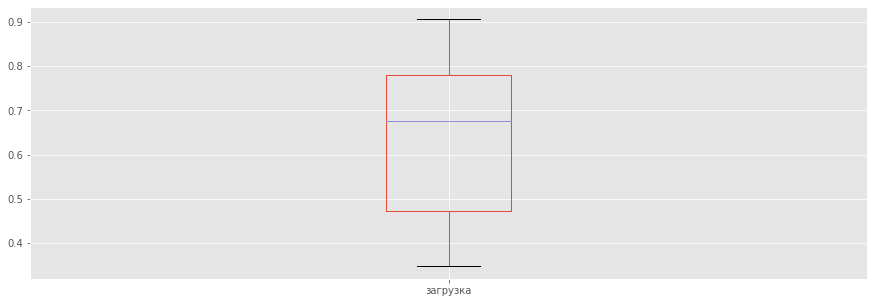

In [8]:
data['загрузка'].plot(kind='box')

In [2]:
data = pd.read_clipboard()

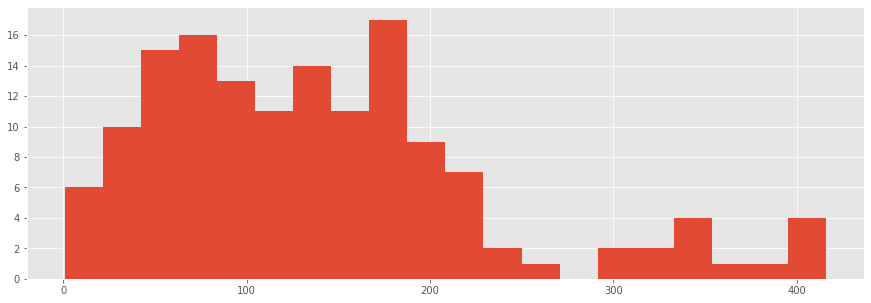

In [7]:
data['Кол-во пациентов'].hist(bins=20)

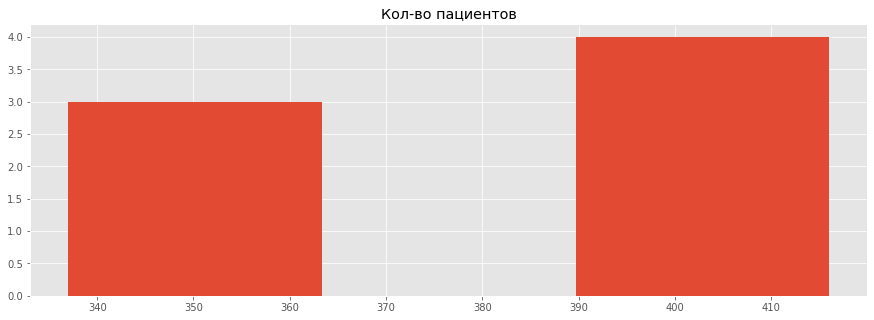

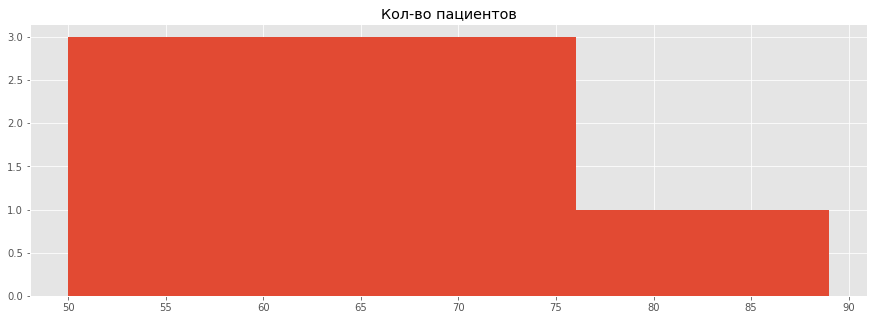

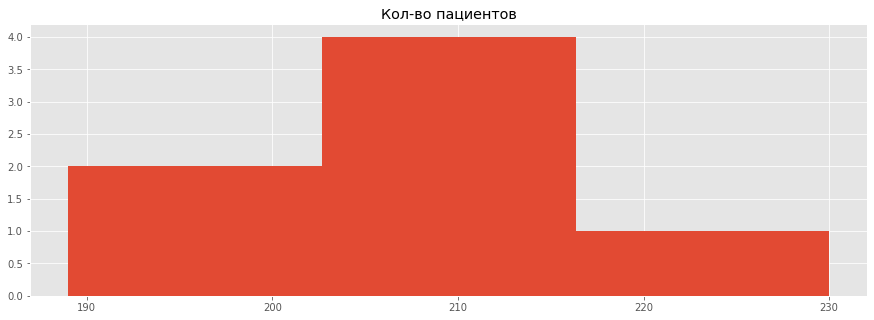

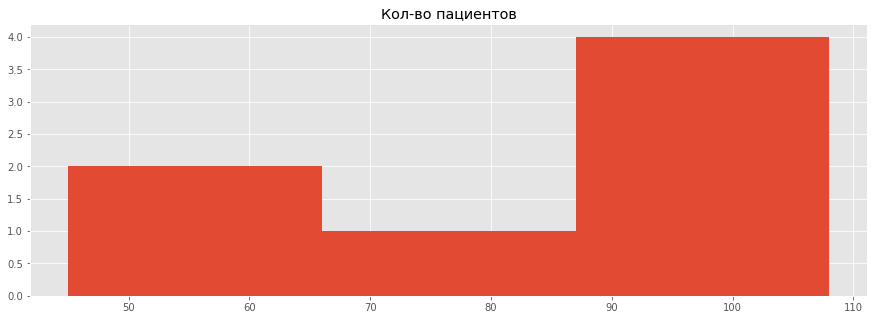

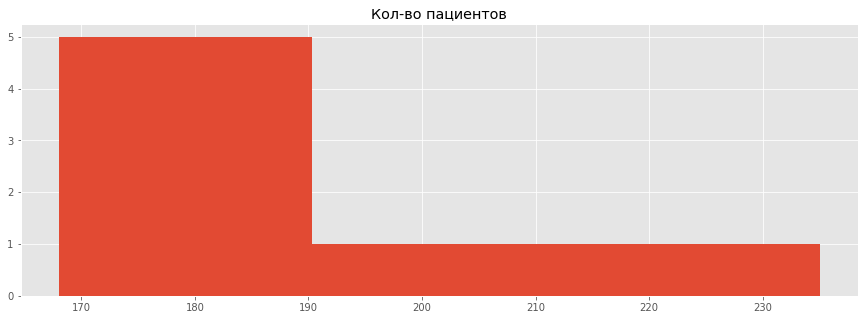

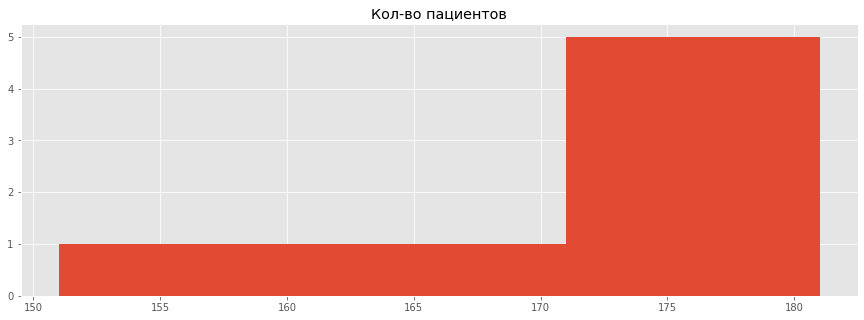

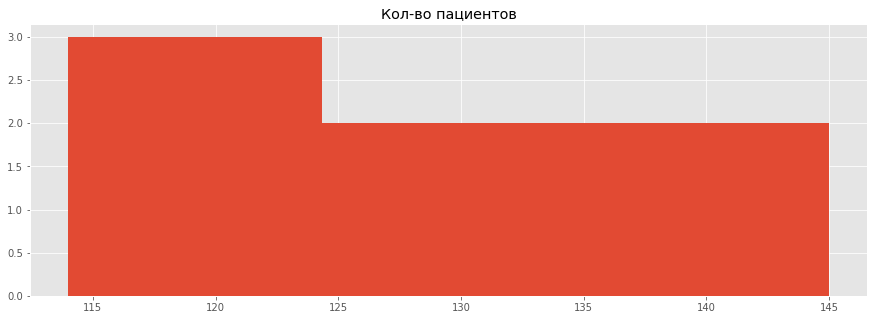

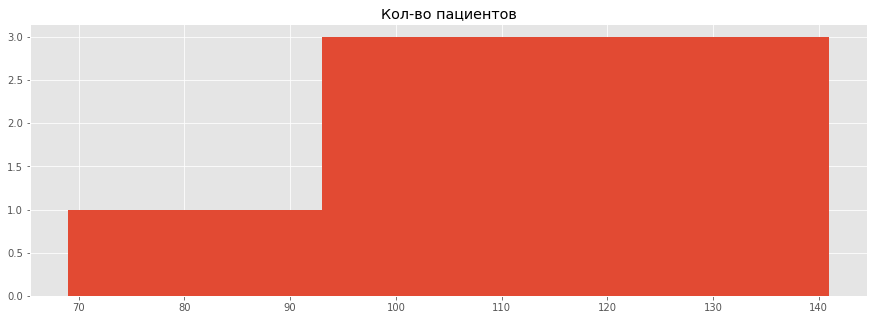

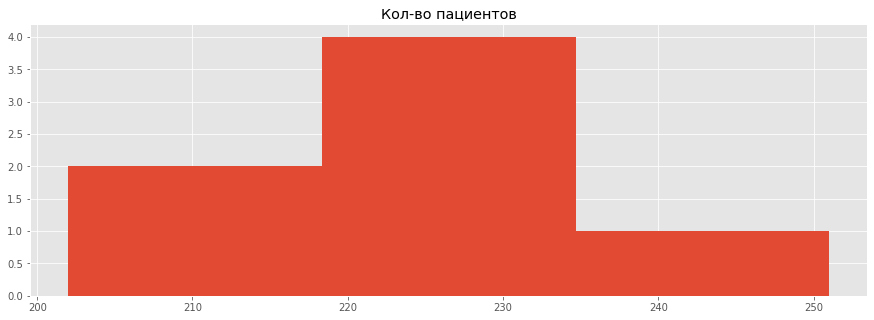

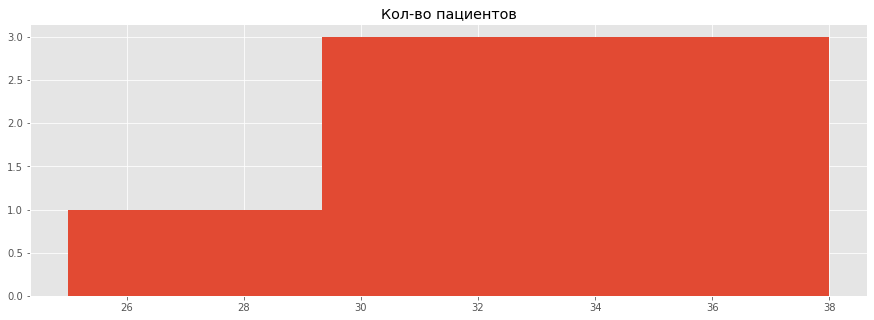

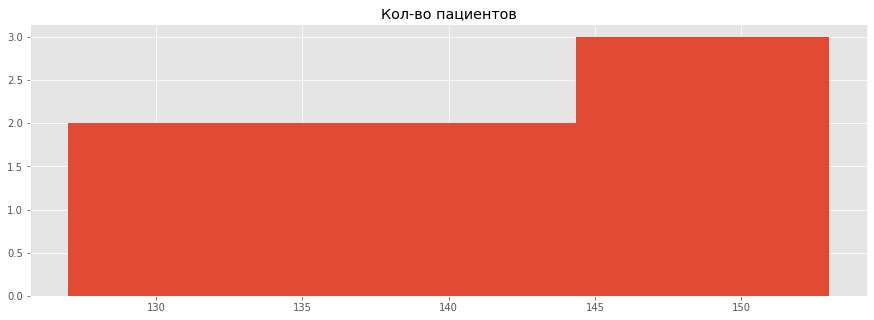

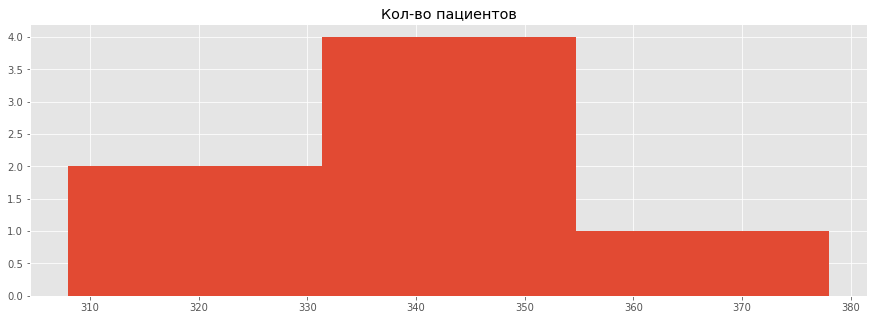

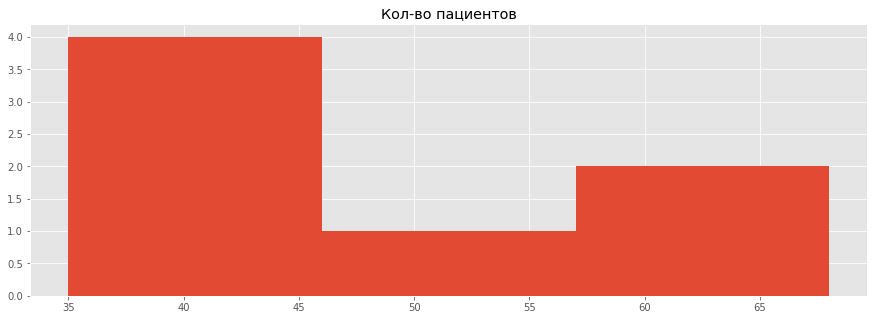

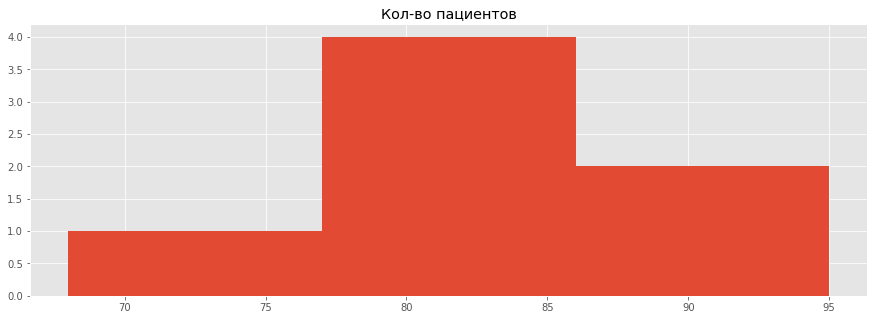

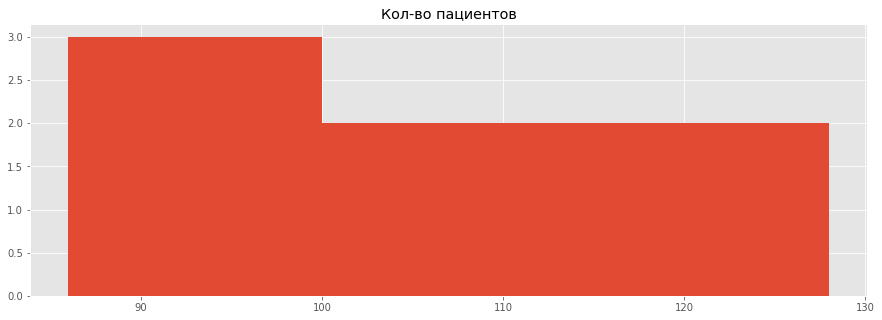

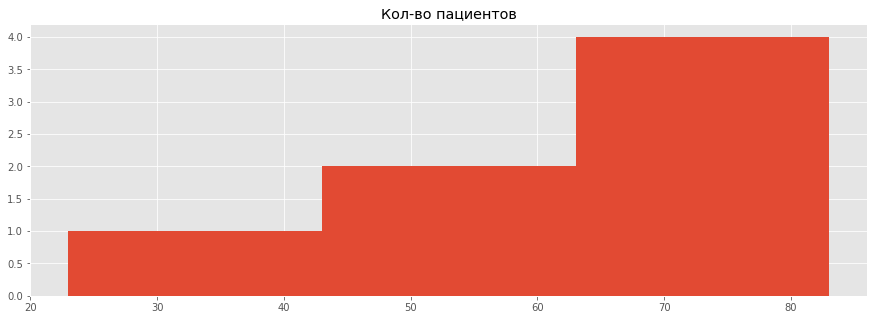

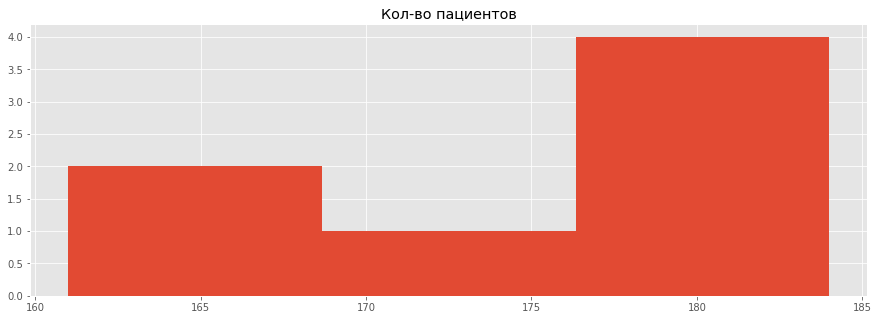

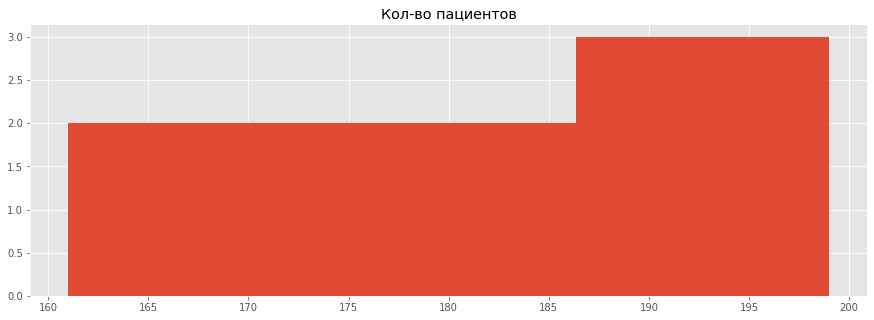

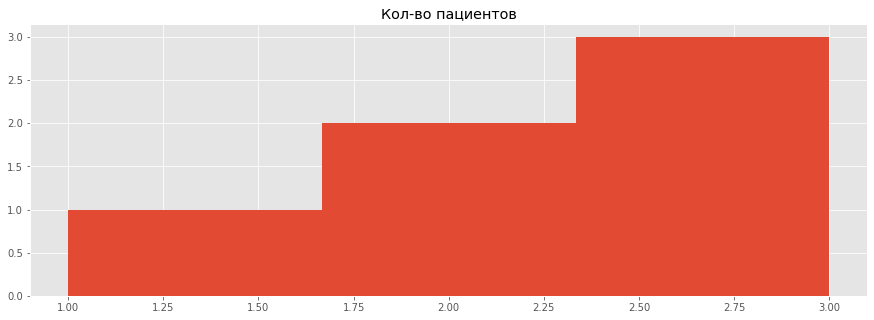

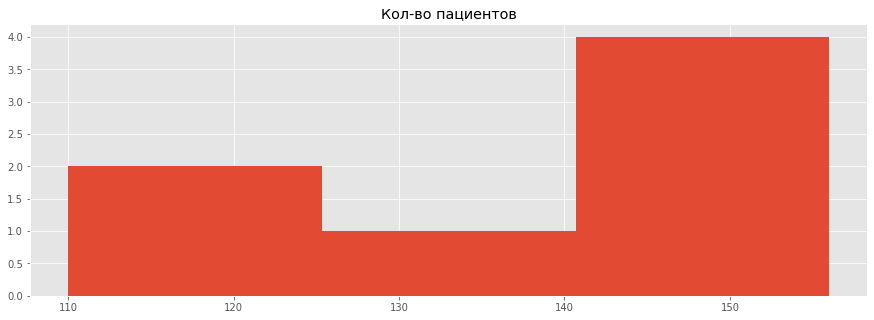

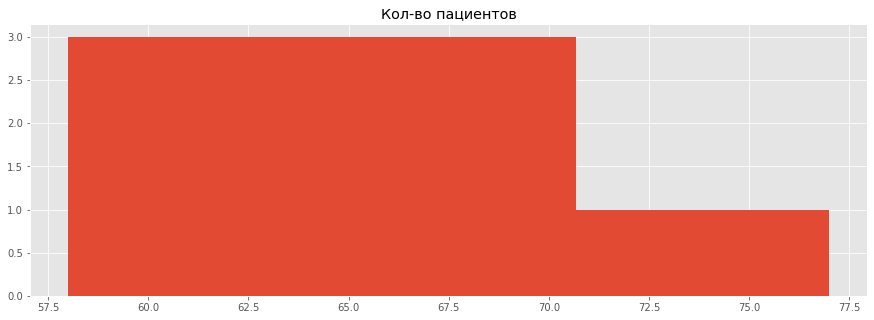

In [22]:
data['Дата приема'] = pd.to_datetime(data['Дата приема'])

for filial in data['Филиал'].unique():
    data[data['Филиал'] == filial][['Дата приема', 'Кол-во пациентов']].hist(bins=3)
    

In [61]:
data

,Дата приема,Филиал,Кол-во пациентов
0,2020-04-12,Б.С. 45,416
1,2020-05-12,Б.С. 45,337
2,2020-06-12,Б.С. 45,363
3,2020-07-12,Б.С. 45,414
4,2020-08-12,Б.С. 45,413
...,...,...,...
141,2020-06-12,Щерб.11,60
142,2020-07-12,Щерб.11,66
143,2020-08-12,Щерб.11,77
144,2020-09-12,Щерб.11,59


In [75]:
data_new = data.pivot(index='Филиал', columns='Дата приема', values='Кол-во пациентов')

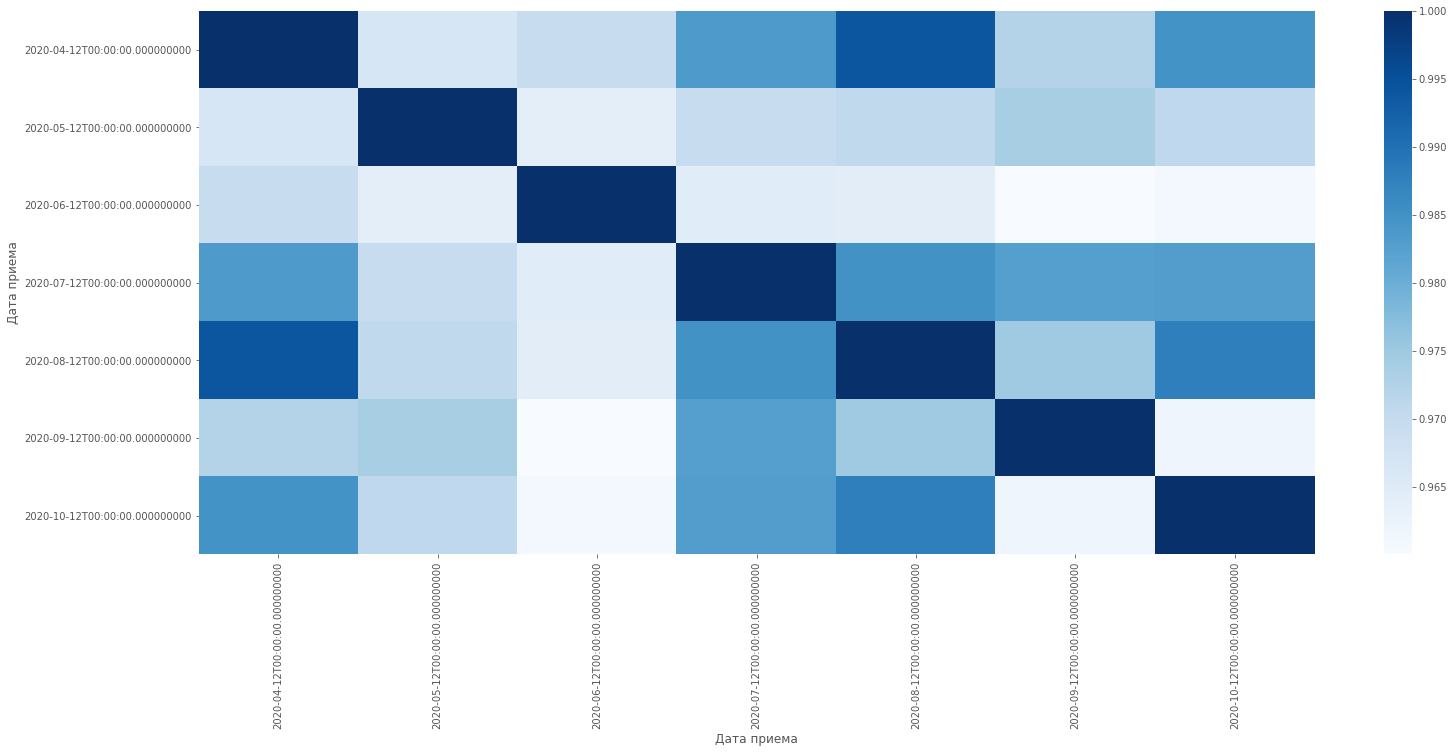

In [76]:
import seaborn as sns

sns.heatmap(data_new.corr(), cmap='Blues')

In [77]:
data_new.dropna(inplace=True)

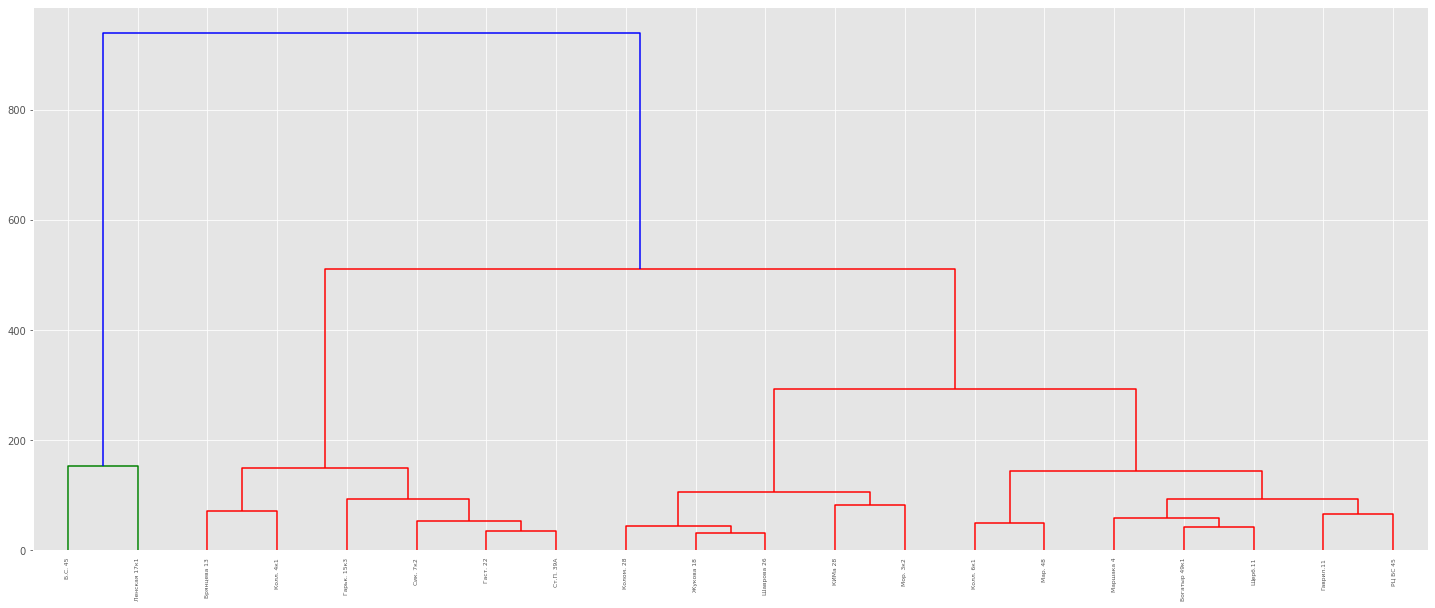

In [79]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Создаем датафрейм
seeds_df = pd.read_csv(
"http://qps.ru/jNZUT")

# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
 #varieties = list(seeds_df.pop('grain_variety'))

# Извлекаем измерения как массив NumPy
#samples = data_new.values.astype(int)

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(data_new, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=data_new.index,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

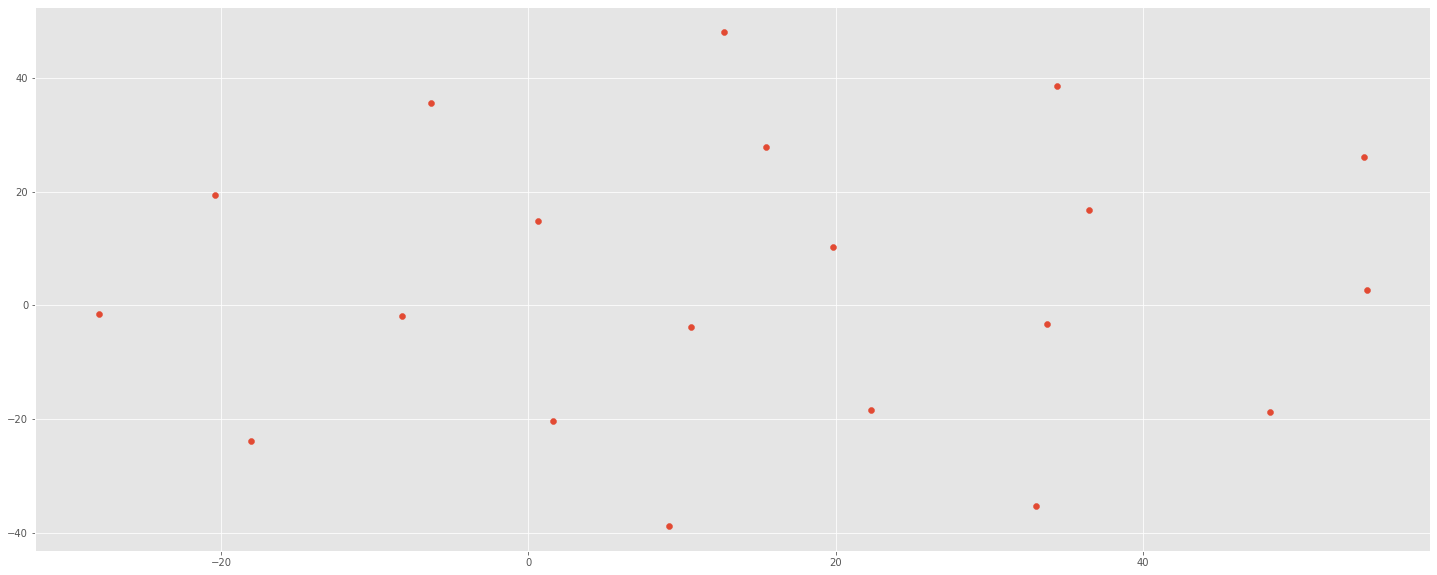

In [81]:
# Импорт библиотек
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(data_new)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

In [60]:
data_new

Филиал,Б.С. 45,Богатыр 49к1,Брянцева 13,Гаврил.11,Гарьк. 15к3,Гаст. 22,Жукова 18,КИМа 28,Колл. 4к1,Колл. 6к1,...,Ленская 17к1,Мар. 48,Маршака 4,Мор. 3к2,РЦ БС 45,Сик. 7к2,Ст.П. 39А,ЦАХ,Шаврова 26,Щерб.11
0,416.0,50.0,213.0,61.0,180.0,179.0,143.0,131.0,224.0,33.0,...,351.0,50.0,77.0,86.0,51.0,161.0,199.0,3.0,156.0,66.0
1,337.0,63.0,189.0,108.0,169.0,162.0,118.0,107.0,251.0,25.0,...,336.0,44.0,82.0,128.0,55.0,176.0,161.0,3.0,121.0,58.0
2,363.0,89.0,230.0,45.0,185.0,180.0,124.0,69.0,226.0,30.0,...,309.0,35.0,95.0,108.0,23.0,165.0,185.0,1.0,110.0,60.0
3,414.0,50.0,203.0,85.0,210.0,171.0,145.0,100.0,215.0,30.0,...,332.0,43.0,79.0,125.0,83.0,184.0,185.0,NaN,146.0,66.0
4,413.0,64.0,204.0,90.0,181.0,181.0,130.0,141.0,226.0,38.0,...,332.0,68.0,85.0,98.0,73.0,180.0,197.0,3.0,142.0,77.0
5,351.0,64.0,208.0,98.0,235.0,151.0,133.0,125.0,229.0,35.0,...,308.0,63.0,92.0,107.0,79.0,180.0,166.0,2.0,147.0,59.0
6,412.0,53.0,199.0,91.0,168.0,180.0,114.0,93.0,202.0,36.0,...,378.0,39.0,68.0,92.0,75.0,177.0,193.0,2.0,131.0,66.0


In [70]:
 varieties = list(seeds_df.pop('grain_variety'))

In [71]:
varieties

['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

In [83]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

# Загружаем набор данных
iris_df = datasets.load_iris()

# Описываем модель
model = KMeans(n_clusters=3)

# Проводим моделирование
model.fit(data_new)


# Предсказание на всем наборе данных
all_predictions = model.predict(data_new)

# Выводим предсказания

print(all_predictions)
print(data_new.index)

[2 0 1 0 1 1 1 0 1 0 1 2 0 0 0 0 1 1 1 0]
Index(['Б.С. 45', 'Богатыр 49к1', 'Брянцева 13', 'Гаврил.11', 'Гарьк. 15к3',
       'Гаст. 22', 'Жукова 18', 'КИМа 28', 'Колл. 4к1', 'Колл. 6к1',
       'Колом. 28', 'Ленская 17к1', 'Мар. 48', 'Маршака 4', 'Мор. 3к2',
       'РЦ БС 45', 'Сик. 7к2', 'Ст.П. 39А', 'Шаврова 26', 'Щерб.11'],
      dtype='object', name='Филиал')


In [84]:
data_new['Класс'] = all_predictions

In [86]:
data_new.sort_values(by='Класс')

Дата приема,2020-04-12 00:00:00,2020-05-12 00:00:00,2020-06-12 00:00:00,2020-07-12 00:00:00,2020-08-12 00:00:00,2020-09-12 00:00:00,2020-10-12 00:00:00,Класс
Филиал,,,,,,,,
Колл. 6к1,33.0,25.0,30.0,30.0,38.0,35.0,36.0,0
РЦ БС 45,51.0,55.0,23.0,83.0,73.0,79.0,75.0,0
Мор. 3к2,86.0,128.0,108.0,125.0,98.0,107.0,92.0,0
Маршака 4,77.0,82.0,95.0,79.0,85.0,92.0,68.0,0
Мар. 48,50.0,44.0,35.0,43.0,68.0,63.0,39.0,0
КИМа 28,131.0,107.0,69.0,100.0,141.0,125.0,93.0,0
Щерб.11,66.0,58.0,60.0,66.0,77.0,59.0,66.0,0
Гаврил.11,61.0,108.0,45.0,85.0,90.0,98.0,91.0,0
Богатыр 49к1,50.0,63.0,89.0,50.0,64.0,64.0,53.0,0


In [5]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, mean_squared_error

a = [0,1,1,0,0,1,1,0,0,0]
b = [0,1,1,0,0,1,0,1,0,1]

precision_score(a, b)
recall_score(a, b)

ver = [0.35, 0.85, 0.75, 0.25, 0.05, 0.45, 0.95, 0.65, 0.15, 0.55]

roc_auc_score(a, ver)

a = [10, 2, -1, 3, 7]

b = [8, 1, 3, -1, 6]

mean_squared_error(a, b)

7.6

In [50]:
import os
os.chdir(r'R:\AmanovRA\сравнить')

data_old = pd.read_excel('old.xlsx', sheet_name='Данные', dtype=str)
data_new = pd.read_excel('new.xlsx', dtype=str)

In [51]:
from functools import reduce

In [52]:
# def red(word):
    
#     return reduce(lambda x, y: x + y if y.isdigit() else x + '', word[1:], word[0])

# data_old["Sum([Длительность приема Исполнителя за СМЕНУ]) - sum({$<[Резерв доступен для Пациента?] = {'недоступен'}>}time([Окончание приема]-[Начало приема],'hh:mm:ss'))"] = data_old["Sum([Длительность приема Исполнителя за СМЕНУ]) - sum({$<[Резерв доступен для Пациента?] = {'недоступен'}>}time([Окончание приема]-[Начало приема],'hh:mm:ss'))"].apply(red)

In [53]:
data_old = data_old.sort_values(by=['Исполнитель', 'Дата приема', 'Наименование резерва', "Sum([Длительность приема Исполнителя за СМЕНУ]) - sum({$<[Резерв доступен для Пациента?] = {'недоступен'}>}time([Окончание приема]-[Начало приема],'hh:mm:ss'))"], ignore_index=True)
data_new = data_new.sort_values(by=['Исполнитель', 'Дата приема', 'Наименование резерва', "Sum([Длительность приема Исполнителя за СМЕНУ]) - sum({$<[Резерв доступен для Пациента?] = {'недоступен'}>}time([Окончание приема]-[Начало приема],'hh:mm:ss'))"], ignore_index=True)

In [54]:
g_old = 

Год                                                                                                                                                                 True
Месяц                                                                                                                                                               True
Филиал                                                                                                                                                              True
Отделение из профиля Исполнителя                                                                                                                                    True
Исполнитель                                                                                                                                                         True
Sum([Длительность приема Исполнителя за СМЕНУ]) - sum({$<[Резерв доступен для Пациента?] = {'недоступен'}>}time([Окончание приема]-[Начало приема],'hh:mm:s

In [21]:
data_old.dtypes

Год                                                                                                                                                                         int64
Месяц                                                                                                                                                                      object
Филиал                                                                                                                                                                     object
Отделение из профиля Исполнителя                                                                                                                                           object
Исполнитель                                                                                                                                                                object
Sum([Длительность приема Исполнителя за СМЕНУ]) - sum({$<[Резерв доступен для Пациента?] = {'недоступен'}>}tim

In [30]:
a = [1, 0, 3, 5, 6, 2, 1, 1]

x = reduce(lambda x, y: x + y if y <= 3 else x + 0, a, 0)

In [31]:
x

8

In [39]:
data_old.dtypes

Год                                                                                                                                                                         int64
Месяц                                                                                                                                                                      object
Филиал                                                                                                                                                                     object
Отделение из профиля Исполнителя                                                                                                                                           object
Исполнитель                                                                                                                                                                object
Sum([Длительность приема Исполнителя за СМЕНУ]) - sum({$<[Резерв доступен для Пациента?] = {'недоступен'}>}tim

In [3]:
(datetime.datetime(1900, 2, 28, 3, 45) - datetime.datetime(1899, 12, 31, 0, 0)).total_seconds()

5111100.0

In [23]:
import os

path = os.path.join(r'R:/', 'AmanovRA')

os.chdir(path)

os.getcwd()

'R:\\AmanovRA'

In [24]:
os.listdir()

['cb304285-b93b-4227-aa43-65dc306dc215.xlsx',
 'email_recipients_20201231.csv',
 'База.xlsx']

In [28]:
os.getcwd()

# base = pd.read_excel('‪База.xlsx')

# email_recipients = pd.read_csv('email_recipients_20201231.csv')

for file in os.listdir():
    if 'База' in file:
        base = pd.read_excel(file)
    elif 'email' in file:
        email_recipients = pd.read_csv(file)


In [46]:
base_new = base['Электронный адрес Пациента'].to_list()

email_recipients_new = email_recipients['Email'].to_list()

len(base_new), len(email_recipients_new)

(147248, 90000)

In [47]:
email_recipients_new = list(set(email_recipients_new))

base_new = list(set(base_new))

In [48]:
len(base_new), len(email_recipients_new)

(133117, 90000)

In [63]:
import re

pattern = r'\s'

for i, j in enumerate(base_new):
    if re.search(pattern, j):
        x = re.sub(pattern, '', j)
        base_new[i] = x

In [69]:
base_new = list(map(lambda x: x.lower(), base_new))

In [70]:
for i in base_new:
    if any([j.isupper() for j in i]):
        print(i)

In [74]:
base_new = [i for j in base_new for i in j.split(';')]

In [77]:
base_new = list(set(base_new))

In [79]:
base_new = set(base_new)

email_recipients_new = set(email_recipients_new)

In [82]:
new = base_new & email_recipients_new

In [86]:
new  = pd.Series(list(new), name='emails')

In [88]:
new.to_excel('Email_совпадения.xlsx')

In [91]:
import datetime

func = lambda x: datetime.datetime.strptime(x, '%Y%m%d')

In [92]:
func('20201101')

datetime.datetime(2020, 11, 1, 0, 0)

In [121]:
x = 'rom foo, - he is foo'

pattern = r'(?> foo)'

re.findall(pattern, x)



error: unknown extension ?> at position 1

In [122]:
from operator import itemgetter

l1 = [(1, 2, 3), (3, 1, 1), (8, 5, 3), (3, 4, 2)]

# Сортировка по третьему элементу в кортеже
print(sorted(l1, key=itemgetter(2)))
# Вывод: [(3, 1, 1), (1, 2, 3), (3, 4, 2), (8, 5, 3)]

[(3, 1, 1), (3, 4, 2), (1, 2, 3), (8, 5, 3)]


In [1]:
from urllib.request import urlretrieve

urlretrieve('http://courses.openedu.ru/asset-v1:hse+INTRML+spring_2020+type@asset+block@%D0%9D%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F5_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F__correct_.ipynb', 'dd.ipynb')

('dd.ipynb', <http.client.HTTPMessage at 0x1e42fd59b88>)

In [2]:
import sklearn

In [3]:
sklearn.__version__

'0.22.1'

In [6]:
from difflib import get_close_matches

quart2 = pd.read_clipboard(sep='\n')

In [8]:
quart3 = pd.read_clipboard(sep='\n')

In [13]:
possibilities = quart2['Задача'].to_list()

In [37]:
gs = lambda x: ''.join(get_close_matches(x, possibilities, n=1, cutoff=0.5))

In [38]:
quart3['Сравним тип'] = quart3['Задача'].apply(gs)

In [39]:
(quart3['Сравним тип'] != '').sum()

42

In [42]:
quart3 = quart3.merge(quart2[['Задача', 'Тип']], how='left', left_on='Задача', right_on='Задача')

In [43]:
quart3

,ID,Задача,Крайний срок,Постановщик,Ответственный,Статус,Дата создания,Дата закрытия,Затрачено,Тип_x,Часов,Размер,Сравним тип,Тип_y
0,35462,План: Сравнение структуры дохода Новосибирска ...,11.08.2020 18:00,Афанасьева Мария Вячеславовна,Афанасьева Мария Вячеславовна,Завершена,15.06.2020 19:32,30.12.2020 18:12,58:36:25,NaN,10,Большая,,NaN
1,43095,Сбор базы для таргета ОК,29.12.2020 18:00,Тихомирова Полина Александровна,Аманов Руслан Арсланович,Завершена,25.12.2020 12:24,29.12.2020 15:17,0:27:19,NaN,0,Маленькая,Собрать ЦА для таргета,NaN
2,43112,Статистика,29.12.2020 18:00,Альбов Леонид Борисович,Аманов Руслан Арсланович,Завершена,25.12.2020 16:46,28.12.2020 11:00,0:34:18,NaN,0,Маленькая,Статистика по дерматологам,NaN
3,42600,Аналитика Капельницы и инъекции,18.12.2020 18:00,Даценко Анна Викторовна,Даценко Анна Викторовна,Завершена,11.12.2020 12:24,24.12.2020 15:11,30:43:48,NaN,6,Маленькая,Мониторинг капельницы и инъекции,NaN
4,42917,Мониторинг по БП Новые услуги,22.12.2020 19:00,Рябинина Анастасия Анатольевна,Аманов Руслан Арсланович,Завершена,21.12.2020 12:41,21.12.2020 17:43,4:24:36,NaN,4,Маленькая,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,39731,Выработка по email рассылкам,14.10.2020 18:00,Альбов Леонид Борисович,Альбов Леонид Борисович,Завершена,02.10.2020 15:09,06.10.2020 12:36,0:55:44,NaN,0,Маленькая,Выработка по пациентам,NaN
68,39675,Результаты РК в Google Ads за 3-й кватрал по СПб,09.10.2020 18:00,Альбов Леонид Борисович,Аманов Руслан Арсланович,Завершена,01.10.2020 15:24,05.10.2020 17:06,4:53:50,NaN,4,Маленькая,,NaN
69,37859,#3й квартал #Новые услуги #Панель анализов РВИ,01.09.2020 18:00,Конфисахор Анна Павловна,Конфисахор Анна Павловна,Завершена,06.08.2020 18:58,01.10.2020 14:56,21:46:48,NaN,21,Большая,,NaN
70,35859,"Приложение НСК 2019-02-19 (ред. 06), выгрузка ...",16.07.2020 18:00,Аманов Руслан Арсланович,Лебедева Анна Сергеевна,Завершена,29.06.2020 14:11,07.08.2020 17:16,0:30:00,NaN,0,Маленькая,отчет по услугам Дошколенок за 18 и 19 год,NaN


In [45]:
quart3.to_excel('кварталка4.xlsx')

In [44]:
quart2

,ID,Задача,Крайний срок,Постановщик,Ответственный,Статус,Дата создания,Дата закрытия,Затрачено,Тип,Часов,Размер
0,38662,"Анализ акции ""Купон 25% на консультацию вра...",07.09.2020 18:00,Табенская Ксения Александровна,Аманов Руслан Арсланович,Завершена,01.09.2020 14:58,02.09.2020 18:43,0:51:56,Анализ результатов акции,0,Маленькая
1,35173,Выработка по онлайн заявкам через канал email,05.06.2020 18:00,Альбов Леонид Борисович,Аманов Руслан Арсланович,Завершена,04.06.2020 15:06,08.06.2020 10:37,0:27:28,Анализ результатов рекламных кампаний,0,Маленькая
2,35622,отчет по услугам Дошколенок за 18 и 19 год,24.06.2020 18:00,Афанасьева Мария Вячеславовна,Аманов Руслан Арсланович,Завершена,19.06.2020 14:19,06.08.2020 17:01,1:09:30,Текущая отчетность по НСК,1,Маленькая
3,37736,#3й квартал #Аналитика #Отчет по МЦ за июль,07.08.2020 18:00,Конфисахор Анна Павловна,Аманов Руслан Арсланович,Завершена,04.08.2020 15:50,07.08.2020 18:20,7:07:00,Разовый отчет по запросу,7,Маленькая
4,38394,#3й квартал #Аналитика #Пациенты Мурзаевой,24.09.2020 18:00,Конфисахор Анна Павловна,Аманов Руслан Арсланович,Завершена,25.08.2020 13:14,24.09.2020 17:25,23:54:50,Разовый отчет по запросу,23,Большая
...,...,...,...,...,...,...,...,...,...,...,...,...
146,35862,Списки пациентов врачей по окончанию испытател...,29.06.2020 18:00,Аманов Руслан Арсланович,Аманов Руслан Арсланович,Завершена,29.06.2020 14:33,29.06.2020 14:59,0:25:20,Разовый отчет по запросу,0,Маленькая
147,37246,Статистика по дерматологам,23.07.2020 16:00,Даценко Анна Викторовна,Аманов Руслан Арсланович,Завершена,23.07.2020 12:50,23.07.2020 13:32,NaN,Разовый отчет по запросу,0,Маленькая
148,38438,Формирование базы получателей,31.08.2020 18:00,Альбов Леонид Борисович,Аманов Руслан Арсланович,Завершена,26.08.2020 16:39,28.08.2020 16:26,0:11:52,Формирование e-mal для рассылки,0,Маленькая
149,36064,Чернова невролог оставлять или нет,09.07.2020 18:00,Афанасьева Мария Вячеславовна,Афанасьева Мария Вячеславовна,Завершена,03.07.2020 12:47,03.07.2020 15:29,NaN,Текущая отчетность по НСК,0,Маленькая


In [22]:
from itertools import combinations, combinations_with_replacement, permutations

f = open('temp_len.txt', 'a')
a = list(range(1, 21))
arr = []
for x in range(1, len(a) + 1):
    z = list(combinations(a, x))
    arr.append(len(z))
    f.write(str(z))
    f.write('\n')
    f.write('\n')
    
print(sum(arr))
f.close()

1048575


In [21]:
sum([len(list(combinations(list(range(1, 21)), i))) for i in range(1, 21)])

1048575

In [23]:
import numpy as np

a = np.array((0.2, 0.7, 0.1))
b = np.array((1, 3, 5))

In [27]:
a @ b

2.8

In [28]:
1 / (1 + np.exp(-(a @ b)))

0.9426758241011313

In [37]:
a = 'метод для восстановления зависимости между двумя переменными'

b = 'статистический метод используемый для задач'

c = 'набор алгоритмов обучения с учителем используемый для задач'

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

x = vectorizer.fit_transform([a, b, c]).toarray()

In [38]:
x

array([[0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]], dtype=int64)

In [39]:
def bow(vectorizer, train, test):
    train_bow = vectorizer.fit_transform(train)
    test_bow = vectorizer.transform(test)
    return train_bow, test_bow

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf_idf = TfidfVectorizer()



In [48]:
vectorizer_tf_idf.fit_transform([a, b, c]).toarray()

array([[0.        , 0.41074684, 0.41074684, 0.2425937 , 0.41074684,
        0.        , 0.        , 0.41074684, 0.31238356, 0.        ,
        0.        , 0.41074684, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33631504, 0.        ,
        0.43306685, 0.43306685, 0.        , 0.43306685, 0.        ,
        0.        , 0.        , 0.56943086, 0.        ],
       [0.4261835 , 0.        , 0.        , 0.25171084, 0.        ,
        0.32412354, 0.32412354, 0.        , 0.        , 0.4261835 ,
        0.4261835 , 0.        , 0.        , 0.4261835 ]])

In [46]:
vectorizer_tf_idf.get_feature_names().index('метод')

8

In [55]:
z = '''Он видел ег семь своим глазам

В семь нас был семь

Семер одног н ждут

Семейный ужин был назначен н семь'''.split('\n\n')

In [56]:
z

['Он видел ег семь своим глазам',
 'В семь нас был семь',
 'Семер одног н ждут',
 'Семейный ужин был назначен н семь']

In [57]:
vectorizer2 = CountVectorizer()

x = vectorizer2.fit_transform(z).toarray()

In [58]:
x[:, vectorizer2.get_feature_names().index('семь')]

array([[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [60]:
vectorizer2.get_feature_names().index('семь')

12

In [61]:
x[:, vectorizer2.get_feature_names().index('семь')]

array([1, 2, 0, 1], dtype=int64)

In [37]:
data = pd.read_excel(r'R:\AmanovRA\d0dbb0ef-ee1a-4d96-abf8-98da0c613db2.xlsx')

In [38]:
data = data[['Год', 'Пол', 'Возрастная группа', 'Sum([Количество])']].pivot_table(index=['Возрастная группа'], columns=['Пол', 'Год'], values='Sum([Количество])', aggfunc=sum)
data = data.fillna(0)

In [39]:
data[('Женский', '%')] = ((data[('Женский', 2020)] / data[('Женский', 2019)] - 1) * 100).astype(str).apply(lambda x: x[:x.find('.')] + '%')

In [40]:
data[('Мужской', '%')] = ((data[('Мужской', 2020)] / data[('Мужской', 2019)] - 1) * 100).astype(str).apply(lambda x: x[:x.find('.')] + '%')

In [ ]:
data